In [22]:
%matplotlib inline
import pandas as pd
import numpy as ny
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
PATH=('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

experiment_data = pd.read_csv(PATH)
experiment_data.info()
experiment_data.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1
5,CH,40,6,3,0,5,2,0,2,2,1,76,1
6,CH,41,6,2,4,5,3,10,5,2,2,30,1
7,CH,51,6,2,8,8,8,9,6,4,2,84,2
8,CH,53,6,4,4,4,8,7,4,2,2,62,1
9,CH,55,6,1,6,7,7,9,5,2,2,33,1


In [23]:
#find sample size
pplfair_2012 = experiment_data[experiment_data['year'] == 6]
pplfair_2014 = experiment_data[experiment_data['year'] == 7]

print(pplfair_2012.head(10))
print(pplfair_2014.head(10))


  cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
0    CH     5     6      3        3  ...        5       4     2    60        1
1    CH    25     6      6        5  ...        3       2     2    59        1
2    CH    26     6      1        8  ...        6       3     1    24        2
3    CH    28     6      4        6  ...        6       2     2    64        1
4    CH    29     6      5        6  ...        7       2     2    55        1
5    CH    40     6      3        0  ...        2       2     1    76        1
6    CH    41     6      2        4  ...        5       2     2    30        1
7    CH    51     6      2        8  ...        6       4     2    84        2
8    CH    53     6      4        4  ...        4       2     2    62        1
9    CH    55     6      1        6  ...        5       2     2    33        1

[10 rows x 13 columns]
    cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
732    CH     5     7     

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)
DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


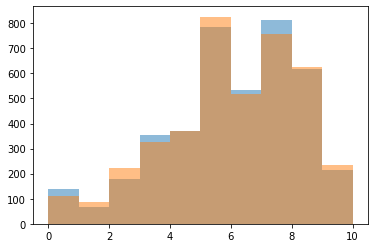

In [24]:
# Did people become less trusting in 2012
plt.hist(pplfair_2012['ppltrst'],alpha=0.5)
plt.hist(pplfair_2014['ppltrst'],alpha=0.5)

print(stats.shapiro(pplfair_2012['ppltrst']))
print(stats.shapiro(pplfair_2014['ppltrst']))

print(stats.describe(pplfair_2012['ppltrst']))
print(stats.describe(pplfair_2014['ppltrst']))


In [15]:
#performing T-Test
stats.ttest_ind(pplfair_2012['ppltrst'],pplfair_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

(array([   8.,   10.,   23.,   55.,   85.,  292.,  312.,  724., 1230.,
        1337.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

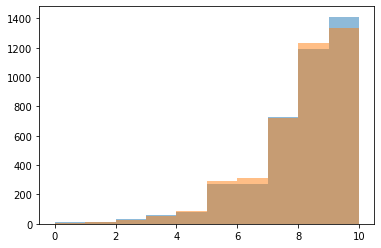

In [26]:
# Did people become happier from 2012 to 2014
plt.hist(pplfair_2012['happy'],alpha=0.5)
plt.hist(pplfair_2014['happy'],alpha=0.5)


In [29]:
#The data isn't normally distributed, therefore use Kruskal-Wallis method
stats.kruskal(
    pplfair_2012['happy'], pplfair_2014['happy']
)

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [36]:
#3. Pick 3 countries; How often they met socially in 2014
ppl_combined_2012 = experiment_data[experiment_data['year'] == 6]
ppl_combined_2014 = experiment_data[experiment_data['year'] == 7]

ppl_cntry_list = ppl_combined_2012['cntry'].unique()
print('Unique Countries:',ppl_cntry_list)

# I'll pick CH, CZ, and DE

Unique Countries: ['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


     cntry      idno  year  tvtot  ...  sclact  gndr  agea  partner
732     CH         5     7      2  ...       4     1    69        1
733     CH        25     7      4  ...       3     1    30        1
734     CH        26     7      3  ...       5     2    49        2
735     CH        28     7      2  ...       2     1    51        1
736     CH        29     7      2  ...       2     2    32        2
...    ...       ...   ...    ...  ...     ...   ...   ...      ...
2704    DE  11000421     7      4  ...       3     2    56        1
2705    DE  11000971     7      4  ...       3     1    65        1
2706    DE  11001031     7      7  ...       1     2    85        2
2707    DE  11001401     7      1  ...       2     2    49        1
2708    DE  11001431     7      6  ...       3     2    89        2

[1363 rows x 13 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f867acef080>,
      dtype=object)

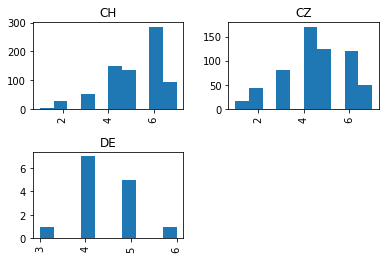

In [40]:
select_ctry_list = ['CH','CZ','DE']
ppl_three_cntry = ppl_combined_2014[ppl_combined_2014['cntry'].isin(select_ctry_list)]
print(ppl_three_cntry)

ppl_three_cntry['cntry'].unique()
ppl_three_cntry['sclmeet'].hist(by = ppl_three_cntry['cntry'])

In [41]:
#kurskal-Wallis test

stats.kruskal(
   ppl_three_cntry.loc[ppl_three_cntry['cntry'] == 'CH',['sclmeet']],
   ppl_three_cntry.loc[ppl_three_cntry['cntry'] == 'CZ',['sclmeet']],
   ppl_three_cntry.loc[ppl_three_cntry['cntry'] == 'DE',['sclmeet']])

KruskalResult(statistic=78.92727862878502, pvalue=7.263721926337026e-18)

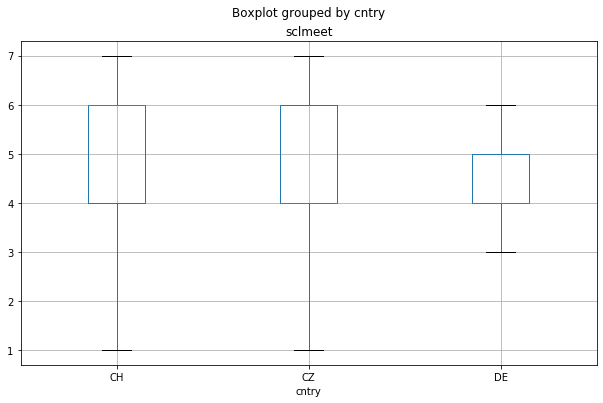

In [42]:
#Box Plot
ppl_three_cntry.boxplot('sclmeet', by='cntry', figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f867ab310b8>,
      dtype=object)

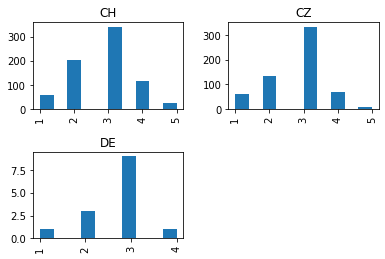

In [44]:
ppl_three_cntry['sclact'].hist(by=ppl_three_cntry['cntry'])

In [45]:
stats.f_oneway(
   ppl_three_cntry.loc[ppl_three_cntry['cntry'] == 'CH',['sclact']],
   ppl_three_cntry.loc[ppl_three_cntry['cntry'] == 'CZ',['sclact']],
   ppl_three_cntry.loc[ppl_three_cntry['cntry'] == 'DE',['sclact']])

F_onewayResult(statistic=array([0.68053231]), pvalue=array([0.50651973]))

In [46]:
#Pairwise statistics
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = ppl_three_cntry['sclact'],      # Data
                          groups = ppl_three_cntry['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.4848,-0.168,0.0575,False
CH,DE,-0.0704,0.9,-0.626,0.4853,False
CZ,DE,-0.0151,0.9,-0.5719,0.5417,False


In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
PATH='https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv'
rff_test = pd.read_csv(PATH)
rff_test.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [54]:
rff_pivot = rff_test.pivot(index='Casenr',columns='Measurement',values = 'Unique')
rff_pivot. head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


(array([  6.,  18.,  44., 208., 524., 865., 557., 226.,  59.,   8.]),
 array([-75.5, -61.1, -46.7, -32.3, -17.9,  -3.5,  10.9,  25.3,  39.7,
         54.1,  68.5]),
 <a list of 10 Patch objects>)

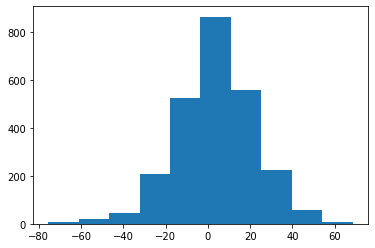

In [58]:
plt.hist(rff_pivot['Measurement 3 (2008-2012)'] - rff_pivot['Measurement 2 (2006-2008)'])

In [61]:
#significant differene between number of perseverative errors
pers_err_pivot = rff_test.pivot(index='Casenr',columns='Measurement', values='Perseverative')
pers_err_pivot.head(10)

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0
6,25.0,18.0,13.5
7,25.0,36.0,30.0
8,7.0,9.0,12.5
9,7.0,4.5,8.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

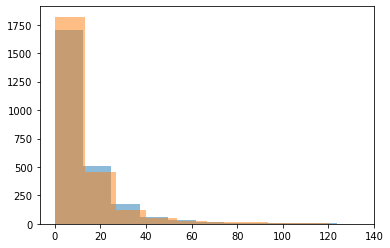

In [62]:
#Use Willcoxn


plt.hist(pers_err_pivot['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(pers_err_pivot['Measurement 2 (2006-2008)'], alpha = .5)